# Plotting correlations
---

### Importing packages

In [290]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import float32, uint32

### Importing aggregate data and restructuring for analysis

In [226]:
df2 = pd.read_csv("Dropoffs_season.csv")
df2["Time"] = pd.to_datetime(df2["Time"].tolist()).to_pydatetime()
df2.head()

,Unnamed: 0,month,Time,speed,gust,Visibility,temp,dewpoint,PCP01,PCP06,...,trip_dist,fare_amt,extra,mta_tax,tip_amt,tolls_amt,improvement_surcharge,Total_amt,Count,Season
0,0,1,2015-01-01 02:51:00,15,0,0,30,12,0,0,...,88951.17,367267.47,13709.0,13746.0,42121.20,2709.30,4344.9,447757.34,27576,Winter
1,1,1,2015-01-01 13:51:00,11,0,0,31,7,0,0,...,46068.34,177765.04,0.5,7954.0,17627.59,3859.21,2699.7,211951.44,15922,Winter
2,2,1,2015-01-05 06:51:00,21,29,0,47,28,0,0,...,25446.53,92728.51,639.5,3908.0,11927.21,3025.90,2336.1,114563.67,7837,Winter
3,3,1,2015-01-05 17:51:00,23,34,0,38,7,0,0,...,51117.92,214602.52,17976.0,9331.0,26383.56,6014.99,5583.3,279887.47,18703,Winter
4,4,1,2015-01-06 10:51:00,6,0,0,21,0,0,0,...,40017.23,215265.52,0.5,8793.5,27479.23,3998.50,5261.7,260796.15,17618,Winter


In [227]:
trip_fields = ['passenger_count','trip_dist', 'fare_amt', 'extra', 'mta_tax', 'tip_amt','tolls_amt', 'improvement_surcharge','Total_amt']
for field in trip_fields:
    df2[field] = df2[field].div(df2["Count"])

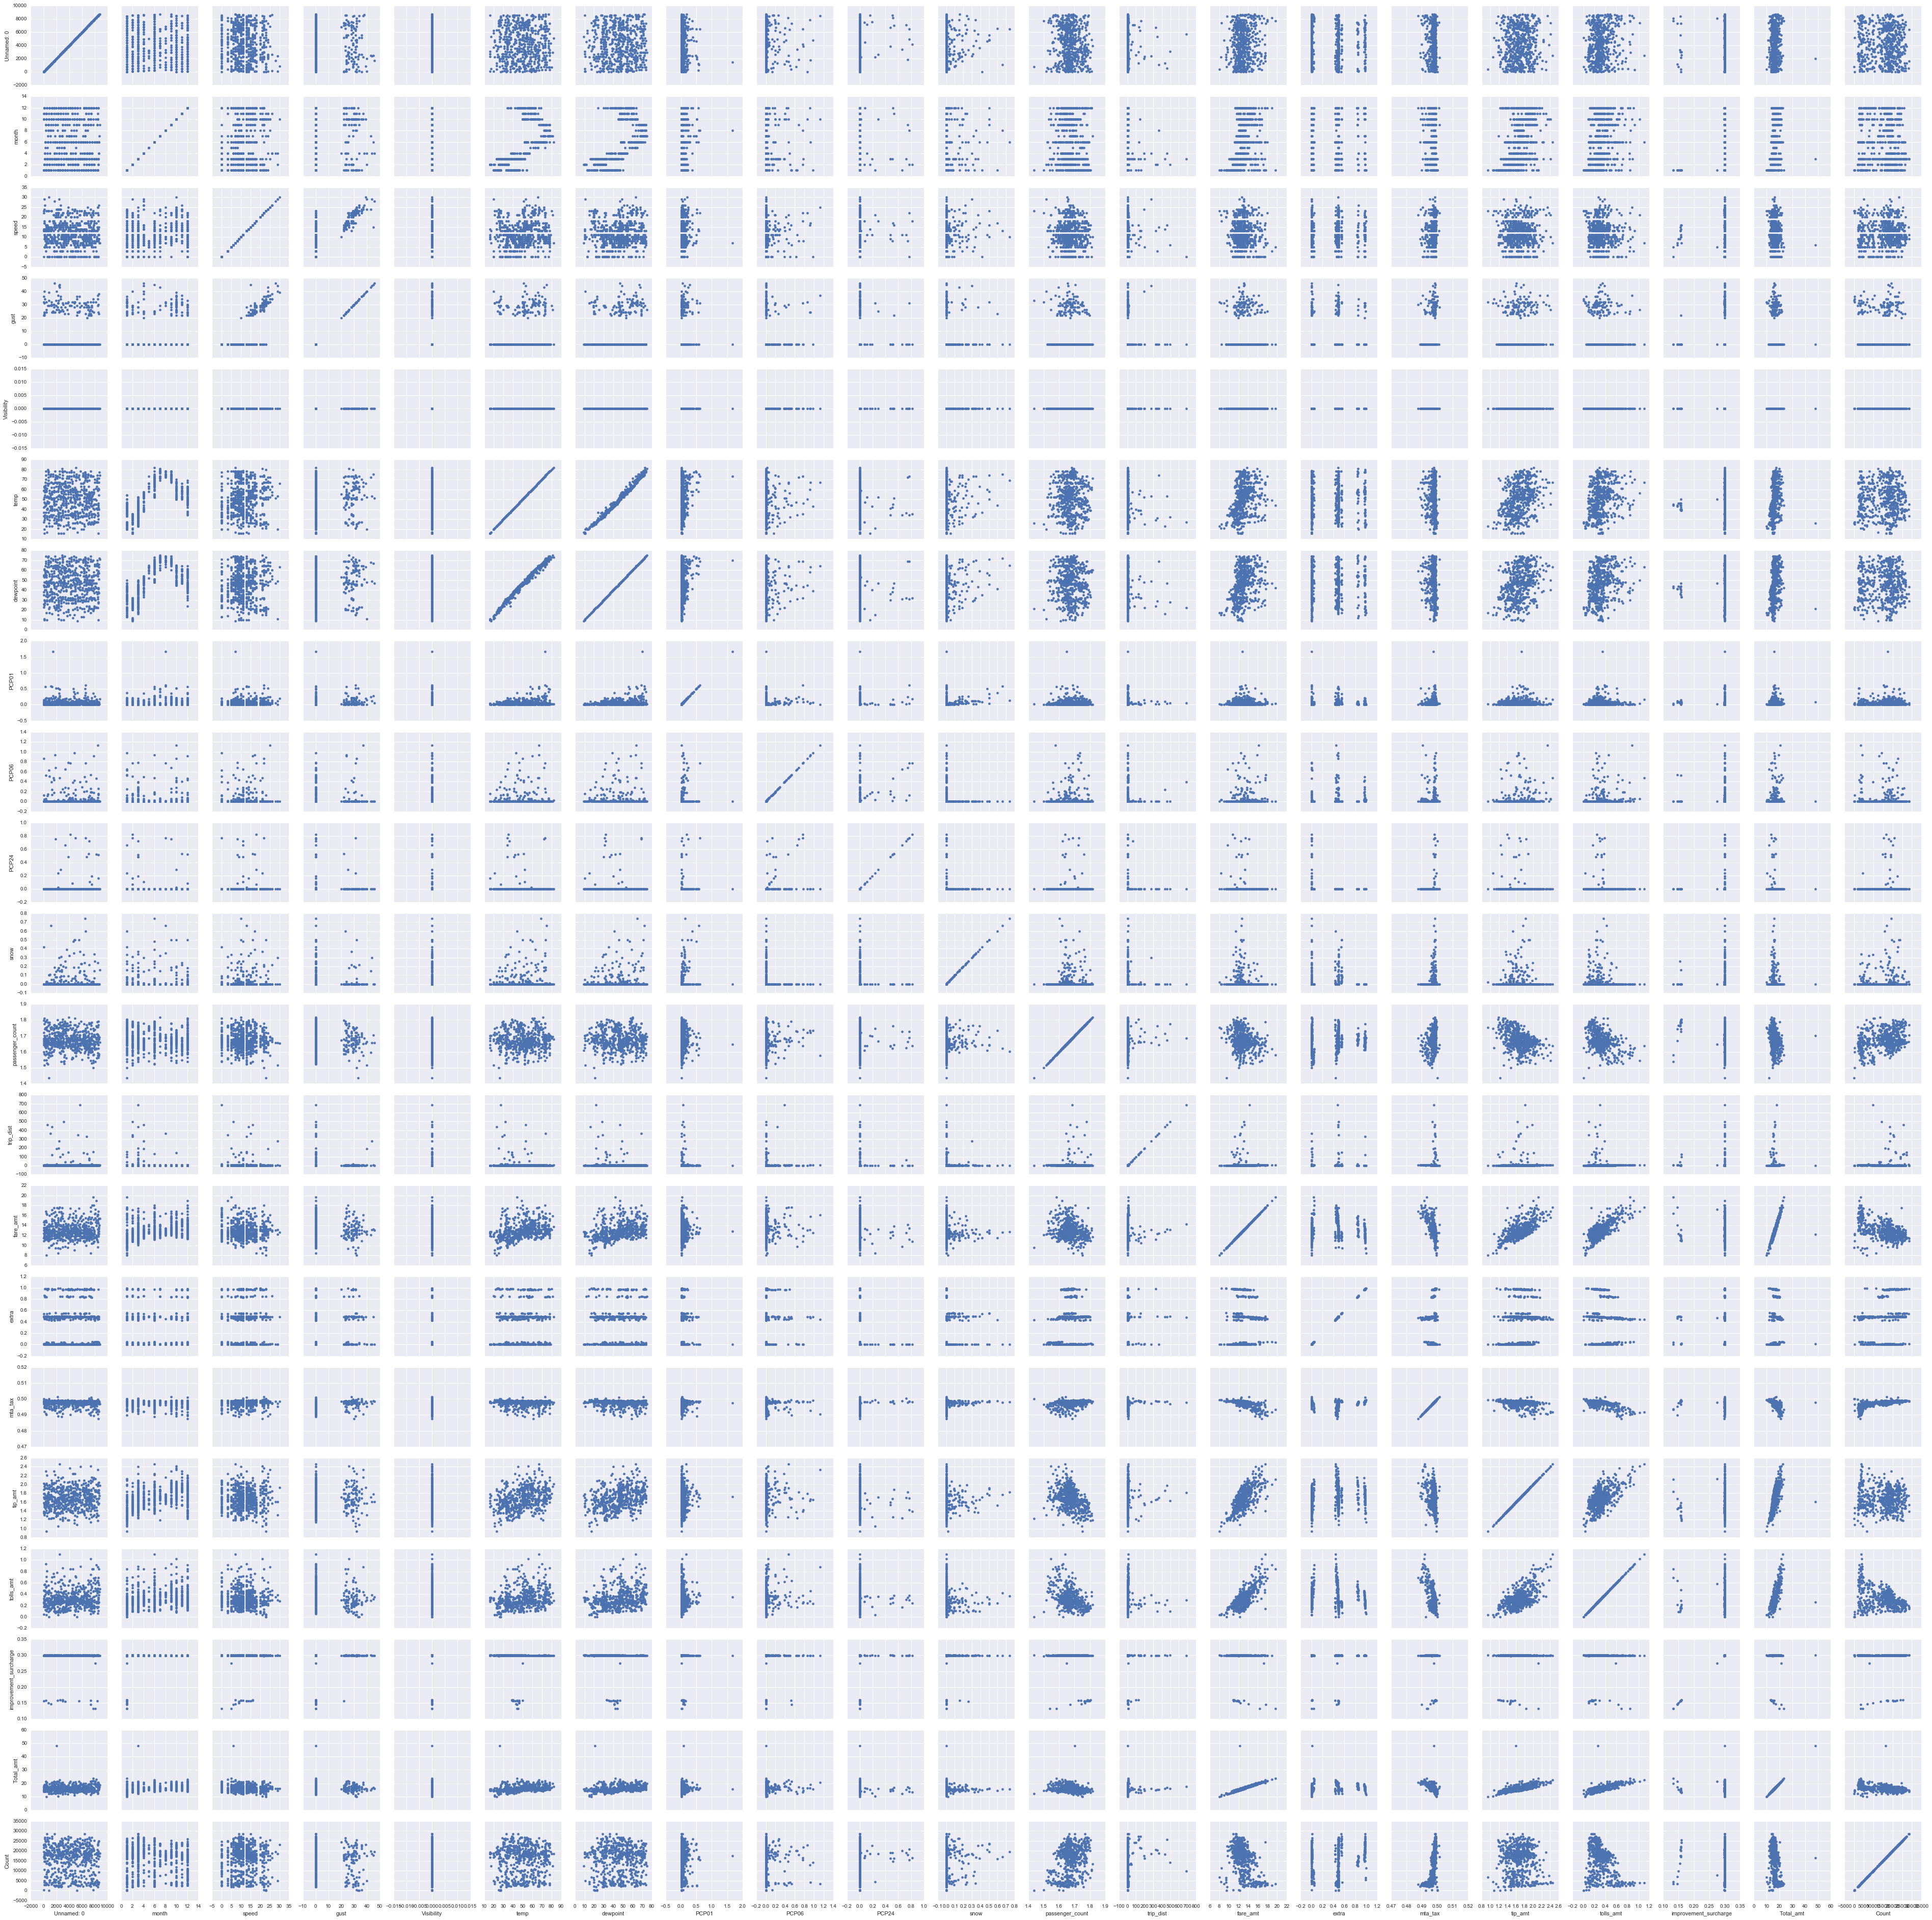

In [193]:
g = sns.PairGrid(rain)
g = g.map(plt.scatter)

In [240]:
rain = df2[df2["PCP01"]>0][df2["Total_amt"]<40]

In [241]:
len(rain)

578

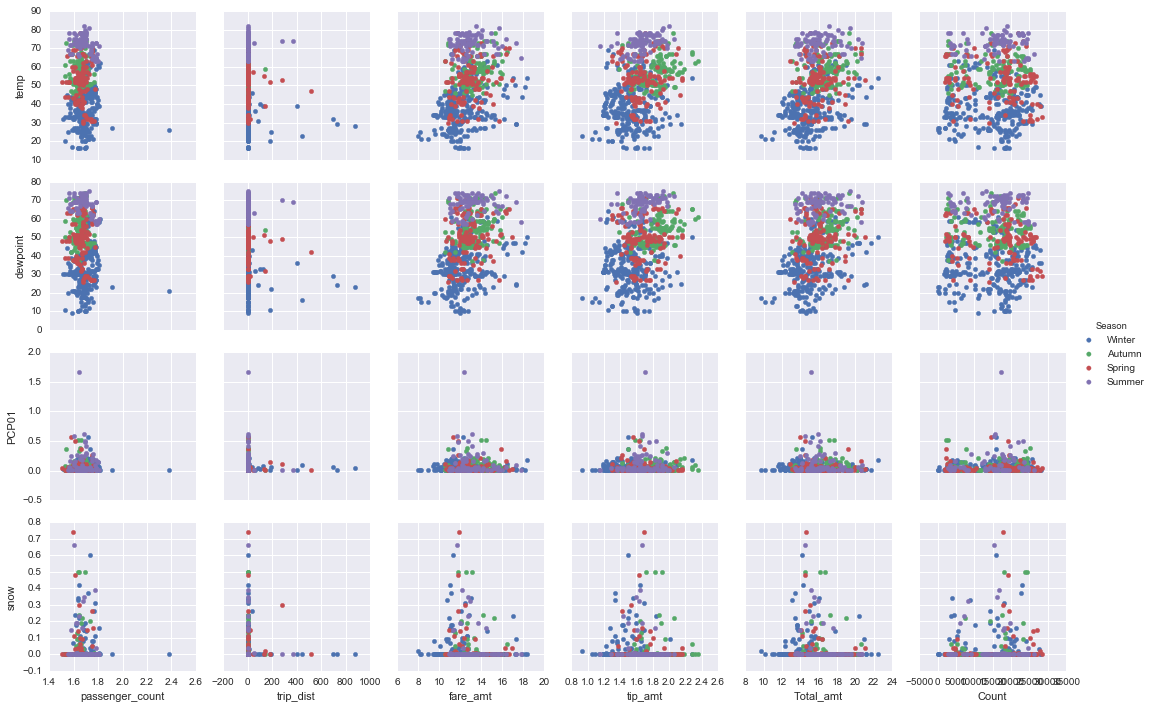

In [242]:
g = sns.PairGrid(rain,x_vars=['passenger_count','trip_dist','fare_amt','tip_amt','Total_amt','Count'],
                              
                              y_vars=['temp','dewpoint','PCP01','snow'],hue = "Season")
                              
                              
g = g.map(plt.scatter)
g = g.add_legend()

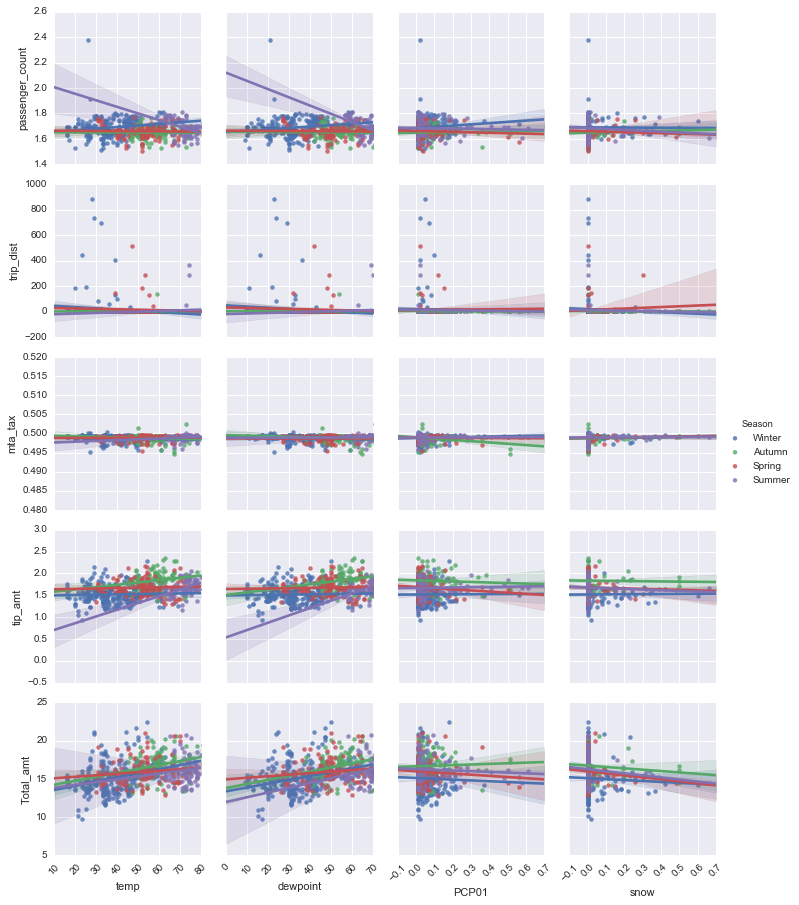

In [493]:
g = sns.PairGrid(rain,x_vars=['temp','dewpoint','PCP01','snow'],y_vars=['passenger_count','trip_dist','mta_tax','tip_amt','Total_amt']                            
                              ,hue = "Season")


g.map(sns.regplot)  
sns.color_palette("Paired")
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.1)  

plt.savefig("corr_plt.png")

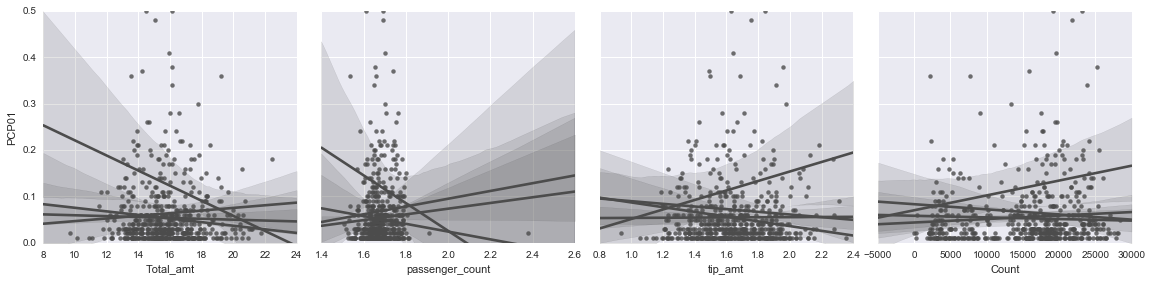

In [492]:
g = sns.PairGrid(rain, y_vars=["PCP01"], x_vars=["Total_amt", "passenger_count","tip_amt","Count"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 0.5))
plt.ylabel="Rainfall"



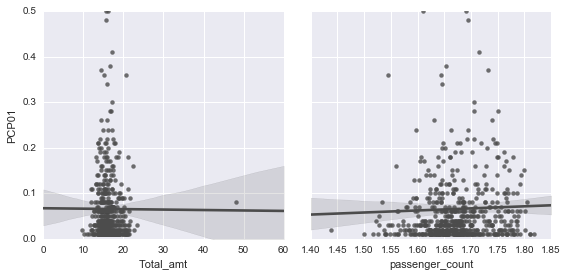

In [186]:
g = sns.PairGrid(rain, y_vars=["PCP01"], x_vars=["Total_amt", "passenger_count"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 0.5)); #, yticks=[0, 5, 10]

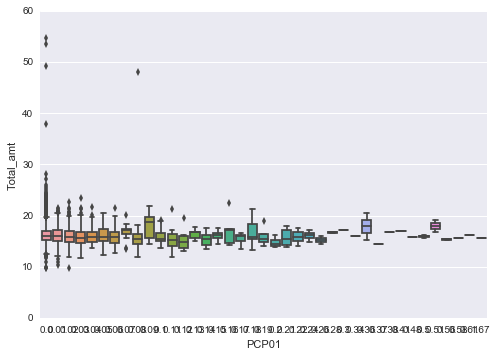

In [207]:
ax = sns.boxplot(x="PCP01", y="Total_amt", data=df2)
#plt.setp(ax.get_xticklabels(), rotation=90)

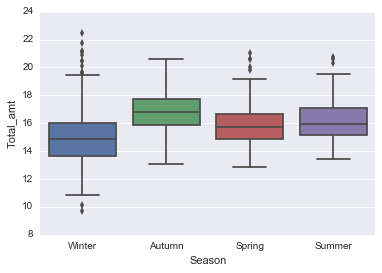

In [377]:
ax = sns.boxplot(x="Season", y="Total_amt", data=rain)

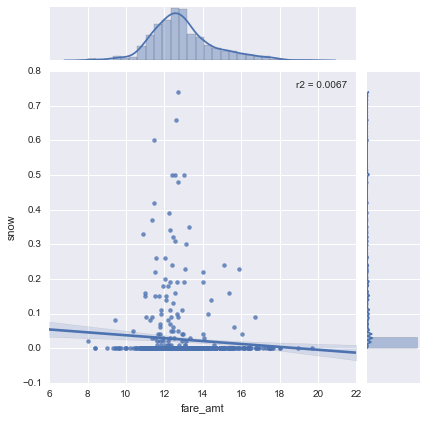

In [192]:
x = rain["fare_amt"]
y = rain["snow"]#[rain["PCP01"]<1]
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

In [419]:
del df2["Unnamed: 0"]

d=df2[df2["PCP01"]==0].copy()

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#plt.suptitle("Correlation heatmap of all variables",fontsize = 20)
plt.savefig("corr_heatmap.png")

corr = df2.corr()

plt.figure(figsize=(12,12))

plt.subplot(221)
corr_rain = corr["PCP01"][trip_fields]
corr_rain.plot(kind='bar',rot=90)
plt.title("Correlation between trip fields and rain")
plt.ylim(-0.1,0.1)

plt.subplot(222)
corr_snow = corr["snow"][trip_fields]
corr_snow.plot(kind='bar',rot=90,colormap="Paired")
plt.title("Correlation between trip fields and snow")
plt.ylim(-0.1,0.1)

plt.subplot(223)
corr_rain = corr["temp"][trip_fields]
corr_rain.plot(kind='bar',rot=90,colormap="prism")
plt.title("Correlation between trip fields and temp")
plt.ylim(-0.2,0.2)

plt.subplot(224)
corr_snow = corr["speed"][trip_fields]
corr_snow.plot(kind='bar',rot=90,colormap="copper")
plt.title("Correlation between trip fields and wind speed")
plt.ylim(-0.2,0.2)



plt.tight_layout()
#plt.suptitle("Correlations between taxi trip fields and weather fields",fontsize=20)
plt.savefig("corr_bar.png")

In [297]:
df2["snow"][df2["snow"]>0.1][df2["Season"]=="Summer"]

1008    0.15
2079    0.39
2438    0.32
3217    0.35
3250    0.19
3922    0.19
4274    0.23
7265    0.16
8381    0.66
Name: snow, dtype: float64

Colormap bon is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

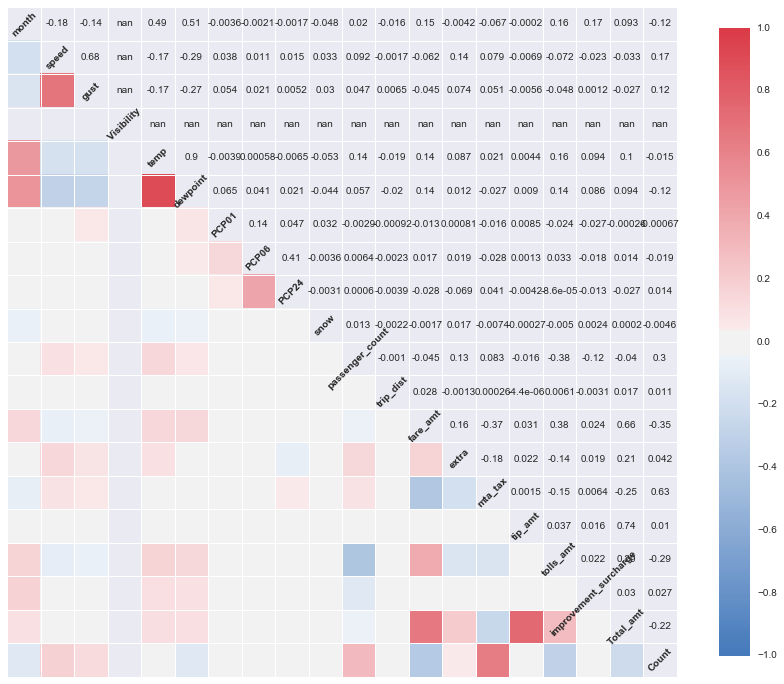

In [473]:
plt.figure(figsize=(15,15))
sns.corrplot(df2, cmap=sns.diverging_palette(250, 10, n=3, as_cmap=True))

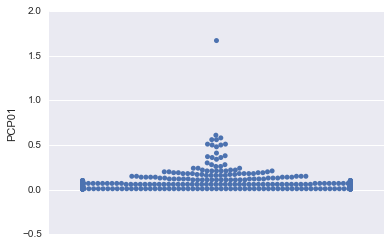

In [477]:
ax = sns.swarmplot(y="PCP01",data=rain)

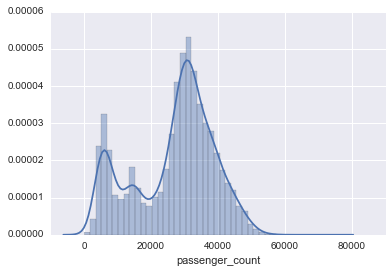

In [489]:
ax = sns.distplot(df["passenger_count"])